In [1]:
import os
import sys
sys.path.insert(0, './utils/')
from utils import load_data, normalize_data, format_data, split_data
from utils import train_model, plot_train_val, forecast, forecast_analysis, experiment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Dense, TimeDistributed, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, LSTM, Bidirectional, Conv1D, Permute
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from copy import copy
from tensorflow.keras import backend as K
from sklearn import preprocessing
import tensorflow.keras.optimizers as optimizers
from sklearn.metrics import mean_squared_error, mean_absolute_error
import time

In [2]:
def experiment(model_fn, hyperp):
    K.clear_session()
    
    # Load and format_data
    df = load_data(hyperp['lookback_window'], city= hyperp['city'])
    if 'normalize' in hyperp and hyperp['normalize']:
        df = normalize_data(df)
    
    x, y = format_data(df, hyperp['lookback_window'])
    val_size = int(math.floor((len(x)*(1-hyperp['train_split_percent']))))
    x_train, y_train, x_val, y_val = split_data(x, y, val_size)
    data = x_train, y_train, x_val, y_val
    
    # Train Model
    input_shape = (x.shape[1], x.shape[2])
    model = model_fn(input_shape)
    train_model(model, data, epochs=hyperp['epochs'], verbose=hyperp['verbose'])
    plot_train_val(model, data)
    df_results = forecast_analysis(model, data)
    return df_results

## Separate splits

## Long Short-Term Memory (LSTM) model

In [3]:
def get_lstm_model(input_shape):
    i = Input(shape=(input_shape))
    print(i.shape)
    m = i
    m = Permute((2, 1))(m)
    m = LSTM(50, activation='relu')(m)
    m = Dense(500, activation='relu')(m)
    m = Dense(200, activation='relu')(m)
    m = Dense(1, activation='relu')(m)
    
    model = Model(inputs=[i], outputs=[m])

    optimizer=optimizers.Adam(lr=5e-6)
    model.compile(optimizer, 'mae')
    return model

## San Juan

W1001 21:01:14.481884 139899112515392 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 23, 170)


W1001 21:01:14.881769 139899112515392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Training...
Train on 498 samples, validate on 268 samples
Epoch 1/50
498/498 - 4s - loss: 0.0725 - val_loss: 0.0328
Epoch 2/50
498/498 - 2s - loss: 0.0667 - val_loss: 0.0323
Epoch 3/50
498/498 - 2s - loss: 0.0634 - val_loss: 0.0346
Epoch 4/50
498/498 - 2s - loss: 0.0620 - val_loss: 0.0367
Epoch 5/50
498/498 - 2s - loss: 0.0615 - val_loss: 0.0383
Epoch 6/50
498/498 - 2s - loss: 0.0612 - val_loss: 0.0388
Epoch 7/50
498/498 - 2s - loss: 0.0610 - val_loss: 0.0385
Epoch 8/50
498/498 - 2s - loss: 0.0608 - val_loss: 0.0383
Epoch 9/50
498/498 - 2s - loss: 0.0607 - val_loss: 0.0382
Epoch 10/50
498/498 - 3s - loss: 0.0605 - val_loss: 0.0373
Epoch 11/50
498/498 - 2s - loss: 0.0603 - val_loss: 0.0373
Epoch 12/50
498/498 - 2s - loss: 0.0601 - val_loss: 0.0369
Epoch 13/50
498/498 - 2s - loss: 0.0599 - val_loss: 0.0367
Epoch 14/50
498/498 - 2s - loss: 0.0598 - val_loss: 0.0366
Epoch 15/50
498/498 - 2s - loss: 0.0596 - val_loss: 0.0362
Epoch 16/50
498/498 - 3s - loss: 0.0594 - val_loss: 0.0359
Epoch 1

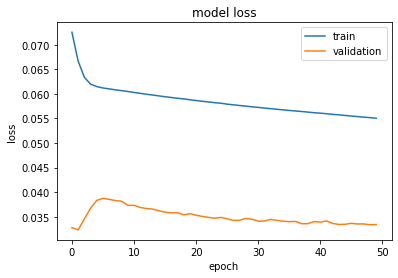

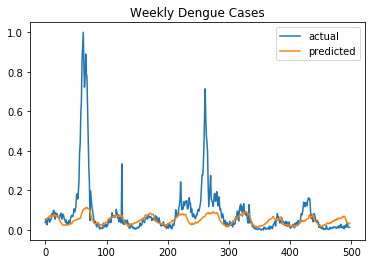

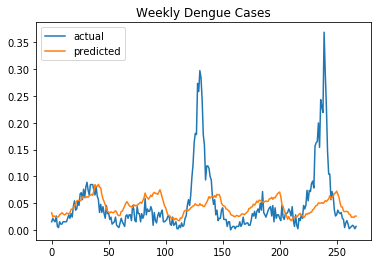

Forecast MAE: 0.033593762472317025


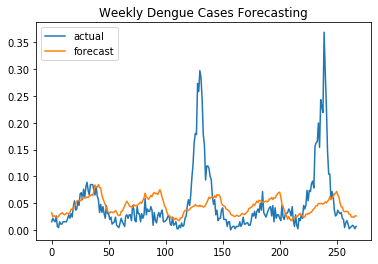

In [4]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 170,
    'normalize': True,
    'epochs': 50,
    'verbose': 2,
    'city':'sj'
}
df_results_sj = experiment(get_lstm_model, hyperparameters)

## Iquitos

(?, 23, 150)
Training...
Train on 241 samples, validate on 129 samples
Epoch 1/400
241/241 - 2s - loss: 0.0636 - val_loss: 0.0895
Epoch 2/400
241/241 - 1s - loss: 0.0627 - val_loss: 0.0886
Epoch 3/400
241/241 - 1s - loss: 0.0615 - val_loss: 0.0875
Epoch 4/400
241/241 - 1s - loss: 0.0600 - val_loss: 0.0863
Epoch 5/400
241/241 - 1s - loss: 0.0581 - val_loss: 0.0849
Epoch 6/400
241/241 - 1s - loss: 0.0562 - val_loss: 0.0832
Epoch 7/400
241/241 - 1s - loss: 0.0541 - val_loss: 0.0812
Epoch 8/400
241/241 - 1s - loss: 0.0522 - val_loss: 0.0789
Epoch 9/400
241/241 - 1s - loss: 0.0503 - val_loss: 0.0765
Epoch 10/400
241/241 - 1s - loss: 0.0487 - val_loss: 0.0743
Epoch 11/400
241/241 - 1s - loss: 0.0471 - val_loss: 0.0726
Epoch 12/400
241/241 - 1s - loss: 0.0460 - val_loss: 0.0713
Epoch 13/400
241/241 - 1s - loss: 0.0451 - val_loss: 0.0703
Epoch 14/400
241/241 - 1s - loss: 0.0445 - val_loss: 0.0696
Epoch 15/400
241/241 - 1s - loss: 0.0441 - val_loss: 0.0691
Epoch 16/400
241/241 - 1s - loss: 0.04

Epoch 136/400
241/241 - 1s - loss: 0.0379 - val_loss: 0.0648
Epoch 137/400
241/241 - 1s - loss: 0.0378 - val_loss: 0.0648
Epoch 138/400
241/241 - 1s - loss: 0.0378 - val_loss: 0.0649
Epoch 139/400
241/241 - 1s - loss: 0.0378 - val_loss: 0.0648
Epoch 140/400
241/241 - 1s - loss: 0.0378 - val_loss: 0.0648
Epoch 141/400
241/241 - 1s - loss: 0.0378 - val_loss: 0.0648
Epoch 142/400
241/241 - 1s - loss: 0.0378 - val_loss: 0.0648
Epoch 143/400
241/241 - 1s - loss: 0.0377 - val_loss: 0.0648
Epoch 144/400
241/241 - 1s - loss: 0.0377 - val_loss: 0.0648
Epoch 145/400
241/241 - 1s - loss: 0.0377 - val_loss: 0.0648
Epoch 146/400
241/241 - 1s - loss: 0.0377 - val_loss: 0.0648
Epoch 147/400
241/241 - 1s - loss: 0.0377 - val_loss: 0.0648
Epoch 148/400
241/241 - 1s - loss: 0.0377 - val_loss: 0.0648
Epoch 149/400
241/241 - 1s - loss: 0.0376 - val_loss: 0.0648
Epoch 150/400
241/241 - 1s - loss: 0.0376 - val_loss: 0.0648
Epoch 151/400
241/241 - 1s - loss: 0.0376 - val_loss: 0.0648
Epoch 152/400
241/241 - 

Epoch 271/400
241/241 - 1s - loss: 0.0359 - val_loss: 0.0640
Epoch 272/400
241/241 - 1s - loss: 0.0359 - val_loss: 0.0640
Epoch 273/400
241/241 - 1s - loss: 0.0359 - val_loss: 0.0639
Epoch 274/400
241/241 - 1s - loss: 0.0359 - val_loss: 0.0639
Epoch 275/400
241/241 - 1s - loss: 0.0359 - val_loss: 0.0639
Epoch 276/400
241/241 - 1s - loss: 0.0358 - val_loss: 0.0640
Epoch 277/400
241/241 - 1s - loss: 0.0358 - val_loss: 0.0640
Epoch 278/400
241/241 - 1s - loss: 0.0358 - val_loss: 0.0639
Epoch 279/400
241/241 - 1s - loss: 0.0358 - val_loss: 0.0639
Epoch 280/400
241/241 - 1s - loss: 0.0358 - val_loss: 0.0639
Epoch 281/400
241/241 - 1s - loss: 0.0358 - val_loss: 0.0639
Epoch 282/400
241/241 - 1s - loss: 0.0358 - val_loss: 0.0639
Epoch 283/400
241/241 - 1s - loss: 0.0357 - val_loss: 0.0639
Epoch 284/400
241/241 - 1s - loss: 0.0357 - val_loss: 0.0639
Epoch 285/400
241/241 - 1s - loss: 0.0357 - val_loss: 0.0639
Epoch 286/400
241/241 - 1s - loss: 0.0357 - val_loss: 0.0639
Epoch 287/400
241/241 - 

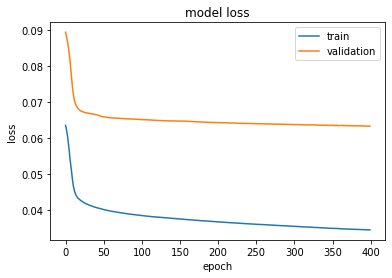

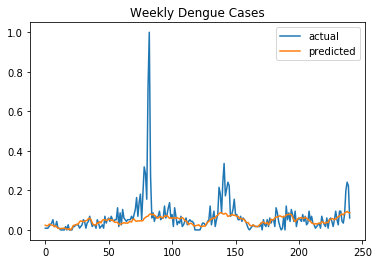

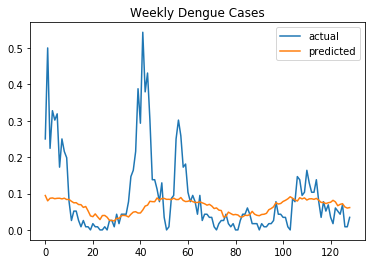

Forecast MAE: 0.06643781857502806


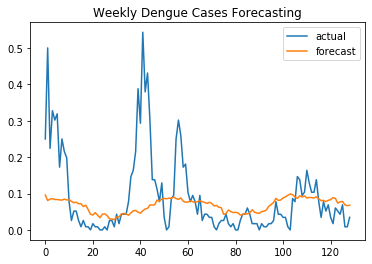

In [5]:
hyperparameters = {
    'train_split_percent': 0.65,
    'lookback_window': 150,
    'normalize': True,
    'epochs': 400,
    'verbose': 2,
    'city':'iq'
}
df_results_iq = experiment(get_lstm_model, hyperparameters)

In [6]:
## inverse normalize error 

new_df = load_data(lookback_window_sj, city='sj')
nx = new_df.total_cases.values.reshape(-1, 1) #returns a numpy array
min_max_scaler_2 = preprocessing.MinMaxScaler()
min_max_scaler_2.fit(nx)

error = min_max_scaler_2.inverse_transform(np.array(0.023616499232121283).reshape(-1, 1))
print("SJ Forecast MAE: {}".format(error))

ndf = load_data(lookback_window_iq, city='iq')
nx2 = ndf.total_cases.values.reshape(-1, 1) #returns a numpy array
min_max_scaler_3 = preprocessing.MinMaxScaler()
min_max_scaler_3.fit(nx2)

error = min_max_scaler_2.inverse_transform(np.array(0.06704732649868755).reshape(-1, 1))
print("IQ Forecast MAE: {}".format(error))

NameError: name 'lookback_window_sj' is not defined